# Homogeense hüperboolse võrrandiga Cauchy ülesande lahendamine


<font size="4.85">
On vaja leida funktsioon $u(x,t)$, mis rahuldab $-\infty<x<\infty$ ja $t>0$ korral võrrandit

\begin{equation}
 \dfrac{1}{a^{2}}\dfrac{\partial^{2} u}{\partial t^{2}}-\dfrac{\partial^{2}u}{\partial x^{2}}=0 \,\, ; \,\,\,\, a=\mathrm{const}>0 \,\,
\end{equation}
ning lisatingimusi
\begin{equation}
u(x,0)=\varphi(x) \,\, ; \,\,\,\, \,\,\,\,  \dfrac{\partial u(x,t)}{\partial t}\biggr |_{t=0}=\psi(x)\,\, ; \,\,\,\,  -\infty < x < \infty  \,\,;
\end{equation}    
kus $\varphi(x)$, $\psi(x)$ on etteantud funktsioonid. 
Kasutades d'Alembert'i valemit ning integreerides numbriliselt, saame ülesande lahendi sõltuvuse ruumikoordinaadist $x$ fikseeritud ajahetkel $t\,$.


<IPython.core.display.Javascript object>


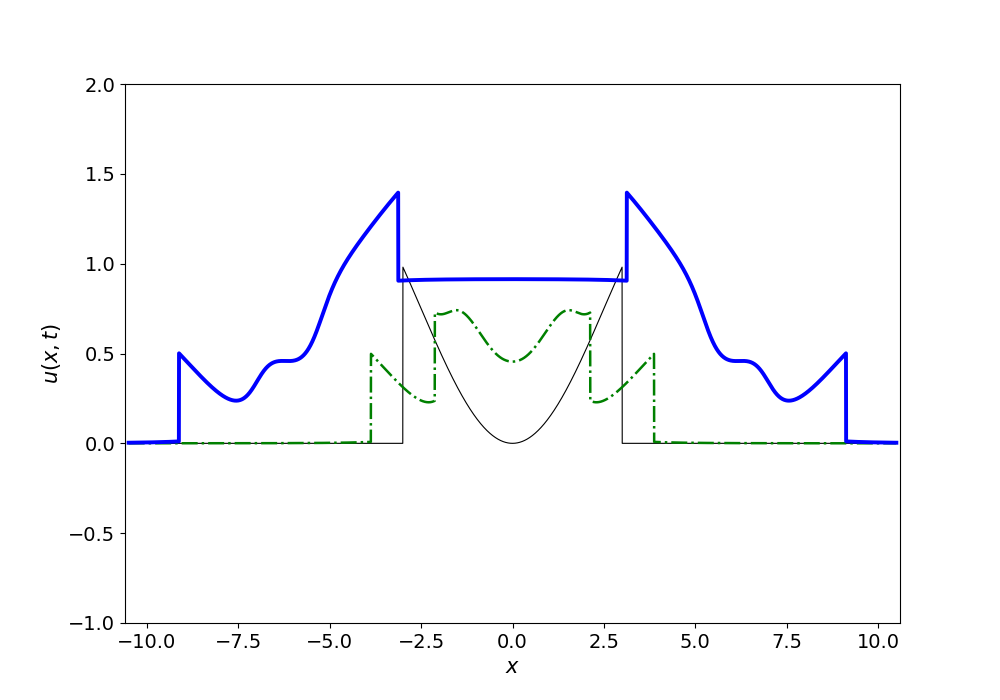


*************************************************
*************************************************
**********PROGRAMM ALUSTAS TÖÖD******************
*************************************************

Cauchy ülesande lahendi sõltuvus ruumikoordinaadist x ajahetkel t= 0 kirjutatakse massiivi data1 .
Cauchy ülesande lahendi sõltuvus ruumikoordinaadist x ajahetkel t= 0.5 kirjutatakse massiivi data2 .
Cauchy ülesande lahendi sõltuvus ruumikoordinaadist x ajahetkel t= 3.5 kirjutatakse massiivi data3 .
Programmi käivitamisest kuni programmi töö lõpuni kulus 8 sekundit aega.

***********************************************
**********PROGRAMM LÕPETAS TÖÖ*****************
***********************************************
***********************************************


In [12]:
%matplotlib notebook
import numpy as np
from timeit import default_timer as timer
from matplotlib import pyplot as plt

def too_algus():
    print('')
    print('*************************************************')
    print('*************************************************')
    print('**********PROGRAMM ALUSTAS TÖÖD******************')
    print('*************************************************')
    print('')
    
def too_lopp():
    print('')
    print('***********************************************')
    print('**********PROGRAMM LÕPETAS TÖÖ*****************')
    print('***********************************************')
    print('***********************************************')
    
pii=np.pi 
a=1.75 
x0=3

def phi(x):
    if (x>-x0) and (x<x0):
       return 1.5*np.sin(0.1*pii*x)**2
    else:
        return 0

def Psi(x,param):
    return x*x/(1+x**6)

def p(x,t):
    return x+(a*t)

def q(x,t):
    return x-(a*t)

def integreeri(fm,param,alumine_raja, ulemine_raja, solmede_arv):
    h = (ulemine_raja-alumine_raja)/ solmede_arv
    argument = np.linspace(alumine_raja+ (h/2), ulemine_raja- (h/2), solmede_arv)
    fun= fm(argument,param)
    pinda = np.sum(fun)* h
    return pinda

def u1(x,t):
    return 0.5*(phi(p(x,t))+phi(q(x,t)))

def u2(x,t):
    return  integreeri(Psi,0,q(x,t), p(x,t), 10000)*(1/2*a)

N=5000
xmin=-x0*3.5
xmax=x0*3.5
xr = np.linspace(xmin, xmax, N)

def u(t,s):
     uusmassiiv='data'+str(s)# unikaalne nimi masiivile 
     print('Cauchy ülesande lahendi sõltuvus ruumikoordinaadist x ajahetkel t=',t,'kirjutatakse massiivi',uusmassiiv,'.')
     uusmassiiv= np.linspace(0, 1, N)# defineerime selle nimega massiivi (sisaldab N elementi), kuhu salvestame tulemuse
     for i in range(N):
        xi=xr[i]
        ti=t
        uusmassiiv[i]=(u1(xi,ti)+u2(xi,ti))
     return uusmassiiv
    
    
plt.figure(figsize=(10,7))    
teljestik = plt.axes(xlim=(xmin-0.1, xmax+0.1), ylim=(-1.0, 2.0))

def joon(joonevarv,joonepaksus,joonestiil):
      return  teljestik.plot([], [], color=joonevarv, lw=float(joonepaksus), linestyle=joonestiil)

plt.rcParams.update({'font.size': 13})               
plt.tick_params(labelsize=14)
plt.xlabel(r"$x$", fontsize=15)
plt.ylabel(r"$u(x,t)$", fontsize=15)

algusaeg = timer()
too_algus()

t0=0
line, = joon('black',0.8,'-')
line.set_data(xr, u(t0,1))

t1=0.5
line, = joon('green',1.8,'-.')
line.set_data(xr, u(t1,2))

t2=3.5
line, = joon('blue',2.8,'-')
line.set_data(xr, u(t2,3))

plt.show()

l6petusaeg = timer()
print('Programmi käivitamisest kuni programmi töö lõpuni kulus',round(l6petusaeg - algusaeg),'sekundit aega.')
too_lopp()
